In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r'C:\Users\sman0\OneDrive\Desktop\Data Science Projects\Project-2\ads.csv')
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


# Check for missing datas and handling if missing values

In [3]:
df.isna().sum() # No Missing data in this dataset.

Unnamed: 0    0
TV            0
radio         0
newspaper     0
sales         0
dtype: int64

In [4]:
df.describe()

,Unnamed: 0,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


<Axes: >

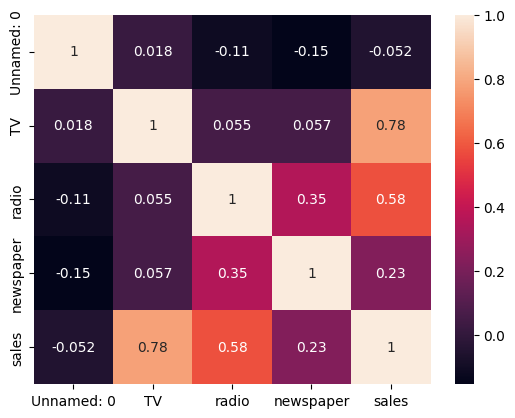

In [5]:
sns.heatmap(df.corr(numeric_only =True),annot=True)

### The above heatmap shows Sales is positively correlated with Tv and radio. 
* There is not relation between radio and TV aswell.
* Therefore we can use TV and radio for Sales Predition.Hence, TV and radio is (feature/independent) and Sales is (target/dependent) variable

<Axes: xlabel='TV', ylabel='sales'>

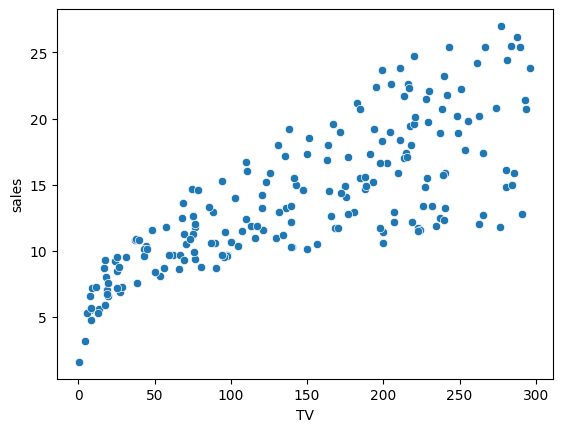

In [6]:
sns.scatterplot(x=df['TV'],y=df['sales'])

<Axes: xlabel='radio', ylabel='sales'>

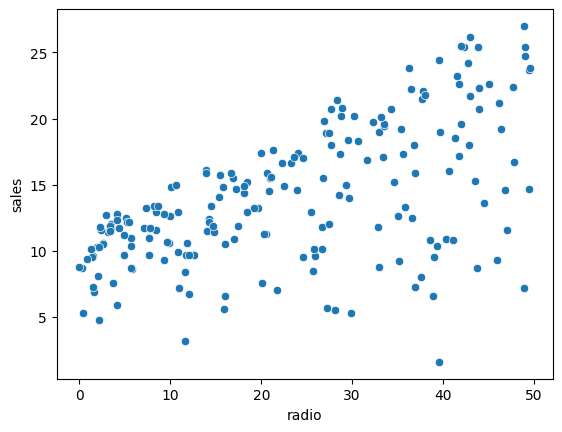

In [7]:
sns.scatterplot(x=df['radio'],y=df['sales'])

* The above scatterplot shows TV is highly correlated with sales and radio is less. Such that if choosing single feature TV is appropriate choice.

# Using Single Feature i.e TV
* # Creating pipeline
* # We want to predict sales and its a continuous data so we use Linear Regression,SVR().

In [8]:
#Selecting feature and Target
X = df.loc[:,['TV']]
y = df.sales

In [10]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state=40)

In [11]:
from sklearn.pipeline import Pipeline
from sklearn.svm import SVR

model = Pipeline([
    ('svm',SVR())
])
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

In [12]:
from sklearn.metrics import r2_score

In [13]:
r2_score(y_true=y_test, y_pred=y_pred)

0.5849747237148275

# Creating model file with pickle to make Sales prediction app with streamlit using TV as feature

In [14]:


import pickle
file = open("sales_pred.pickle","wb")
pickle.dump(model,file)
file.close()

# Using Multiple Feature i.e TV and radio
* # Creating pipeline

In [15]:
X = df.loc[:,['TV','radio']]
y = df.sales

In [16]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state=40)

In [17]:
from sklearn.pipeline import Pipeline
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression

model = Pipeline([
    ('regressor',SVR())
])
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

In [18]:
from sklearn.metrics import r2_score
r2_score(y_true=y_test, y_pred=y_pred)

0.8424131273997038

# Using Multiple Feature i.e TV,radio and Newspaper
* # Creating pipeline

In [19]:
X = df.loc[:,['TV','radio','newspaper']]
y = df.sales

In [20]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state=40)

In [21]:
from sklearn.pipeline import Pipeline
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression

model = Pipeline([
    ('regressor',SVR())
])
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

In [22]:
from sklearn.metrics import r2_score
r2_score(y_true=y_test, y_pred=y_pred)

0.8198093501083715

* Since the r2 score of single feature 'TV'.i.e. 0.58  is lower than the multiple feature 'TV and radio' i.e 0.84, which shows greater accuracy for the multiple feature model.Therefore choosing multiple feature model with TV and radio is more favorable for predicting Sales.
